Build a data set and predict the heart disease based on BP, Sugar, Age, Gender and Cholesterol by using relevant operations

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic data
data = {
    'Age': np.random.randint(29, 77, n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'BP': np.random.randint(80, 180, n_samples),   # Blood Pressure
    'Sugar': np.random.choice([0, 1], n_samples),  # 0 for normal, 1 for high
    'Cholesterol': np.random.randint(150, 300, n_samples),  # Cholesterol level
    'HeartDisease': np.random.choice([0, 1], n_samples)  # 0 for no, 1 for yes
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())


   Age  Gender   BP  Sugar  Cholesterol  HeartDisease
0   67    Male  144      1          161             0
1   57  Female  101      1          194             0
2   43    Male  169      1          239             1
3   71  Female  161      0          252             1
4   36    Male  129      0          157             1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the 'Gender' column
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  #Male=1, Female=0

# Features (X) and target (y)
X = df[['Age', 'Gender', 'BP', 'Sugar', 'Cholesterol']]
y = df['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [8]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Confusion Matrix:
 [[56 44]
 [52 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.56      0.54       100
           1       0.52      0.48      0.50       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

Accuracy: 52.00%


Given a dataset perform comparative analysis using decision tree and SVM algorithm and check accuracy.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Generate a synthetic dataset
np.random.seed(42)
n_samples = 1000
data = {
    'Age': np.random.randint(29, 77, n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'BP': np.random.randint(80, 180, n_samples),
    'Sugar': np.random.choice([0, 1], n_samples),
    'Cholesterol': np.random.randint(150, 300, n_samples),
    'HeartDisease': np.random.choice([0, 1], n_samples)
}

# Convert to DataFrame
df = pd.DataFrame(data)
print(df)

# Encode the 'Gender' column
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Features (X) and target (y)
X = df[['Age', 'Gender', 'BP', 'Sugar', 'Cholesterol']]
y = df['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


     Age  Gender   BP  Sugar  Cholesterol  HeartDisease
0     67    Male  144      1          161             0
1     57  Female  101      1          194             0
2     43    Male  169      1          239             1
3     71  Female  161      0          252             1
4     36    Male  129      0          157             1
..   ...     ...  ...    ...          ...           ...
995   34  Female  158      1          256             0
996   54  Female  129      1          203             1
997   32    Male  146      0          237             0
998   47  Female  128      0          217             0
999   48  Female  115      0          278             1

[1000 rows x 6 columns]


In [25]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")


Decision Tree Accuracy: 0.47


In [27]:
# Train an SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")


SVM Accuracy: 0.49


In [29]:
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Conclusion
if accuracy_dt > accuracy_svm:
    print("The Decision Tree model performs better.")
elif accuracy_svm > accuracy_dt:
    print("The SVM model performs better.")
else:
    print("Both models have the same accuracy.")


Decision Tree Accuracy: 0.47
SVM Accuracy: 0.49
The SVM model performs better.


Create a model to analyze the relation between CIE and SEE result. Build Linear regression Model using Stats model, Scikit Learn

In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Create a synthetic dataset
np.random.seed(42)
n_samples = 100

# CIE scores (out of 50)
cie_scores = np.random.randint(20, 50, n_samples)

# SEE scores (out of 100), with some random noise added
see_scores = cie_scores * 2 + np.random.normal(0, 5, n_samples)

# Convert to DataFrame
df = pd.DataFrame({
    'CIE': cie_scores,
    'SEE': see_scores
})

# Display the first few rows
print(df.head())


   CIE        SEE
0   26  55.491995
1   39  77.141856
2   48  91.464067
3   34  73.943129
4   30  63.927661


In [34]:
# Define the dependent (Y) and independent (X) variables
X = df['CIE']
y = df['SEE']

# Add a constant to the independent variable (required for statsmodels)
X_sm = sm.add_constant(X)

# Build the model
model_sm = sm.OLS(y, X_sm).fit()

# Print the summary of the model
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                    SEE   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1360.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           2.89e-59
Time:                        19:35:48   Log-Likelihood:                -300.82
No. Observations:                 100   AIC:                             605.6
Df Residuals:                      98   BIC:                             610.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0038      2.024     -0.496      0.6

In [36]:
# Reshape X for scikit-learn
X_sk = X.values.reshape(-1, 1)
y_sk = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sk, y_sk, test_size=0.2, random_state=42)

# Create and train the model
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Make predictions
y_pred_sk = model_sk.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_sk)
r2 = r2_score(y_test, y_pred_sk)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 23.44
R^2 Score: 0.92


Statsmodels Coefficients:
const   -1.003806
CIE      2.031118
dtype: float64
Scikit-learn Coefficients:
Intercept: -2.014039746691978, Coefficient: 2.058097037662593


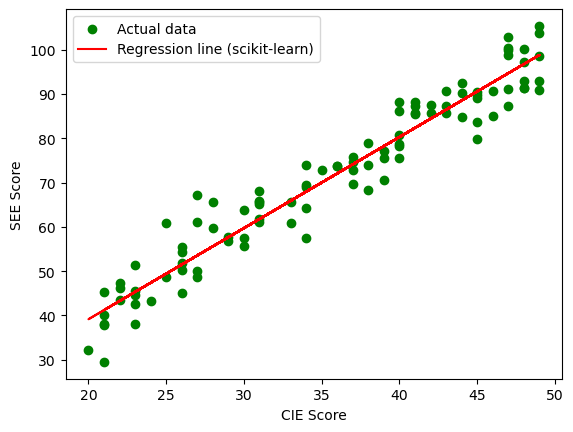

In [40]:
# Print coefficients from both models
print(f"Statsmodels Coefficients:\n{model_sm.params}")
print(f"Scikit-learn Coefficients:\nIntercept: {model_sk.intercept_}, Coefficient: {model_sk.coef_[0]}")

# Plot the original data and the regression line
plt.scatter(X, y, color='green', label='Actual data')
plt.plot(X, model_sk.predict(X_sk), color='red', label='Regression line (scikit-learn)')
plt.xlabel('CIE Score')
plt.ylabel('SEE Score')
plt.legend()
plt.show()


Create a model to analyze the relation between Crop Yield vs Rain Fall rate Build Linear regression Model using Stats model, Scikit Learn

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Create a synthetic dataset
np.random.seed(42)
n_samples = 100

# Rainfall Rate (mm)
rainfall_rate = np.random.uniform(50, 200, n_samples)

# Crop Yield (kg/ha), with some random noise added
crop_yield = 2 * rainfall_rate + np.random.normal(0, 10, n_samples)

# Convert to DataFrame
df = pd.DataFrame({
    'Rainfall': rainfall_rate,
    'CropYield': crop_yield
})

# Display the first few rows
print(df.head())
print(df)

     Rainfall   CropYield
0  106.181018  213.232506
1  192.607146  382.224218
2  159.799091  320.515790
3  139.798773  259.721856
4   73.402796  144.608873
      Rainfall   CropYield
0   106.181018  213.232506
1   192.607146  382.224218
2   159.799091  320.515790
3   139.798773  259.721856
4    73.402796  144.608873
..         ...         ...
95  124.069339  239.980576
96  128.409924  256.048832
97  114.131153  231.673825
98   53.812869  110.392646
99   66.183714  140.639261

[100 rows x 2 columns]


In [49]:
# Define the dependent (Y) and independent (X) variables
X = df['Rainfall']
y = df['CropYield']

# Add a constant to the independent variable (required for statsmodels)
X_sm = sm.add_constant(X)

# Build the model
model_sm = sm.OLS(y, X_sm).fit()

# Print the summary of the model
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:              CropYield   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9289.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           6.65e-99
Time:                        19:42:30   Log-Likelihood:                -361.41
No. Observations:                 100   AIC:                             726.8
Df Residuals:                      98   BIC:                             732.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6835      2.625      1.404      0.1

In [51]:
# Reshape X for scikit-learn
X_sk = X.values.reshape(-1, 1)
y_sk = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sk, y_sk, test_size=0.2, random_state=42)

# Create and train the model
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Make predictions
y_pred_sk = model_sk.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_sk)
r2 = r2_score(y_test, y_pred_sk)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 65.37
R^2 Score: 0.99


Statsmodels Coefficients:
const       3.683539
Rainfall    1.969348
dtype: float64
Scikit-learn Coefficients:
Intercept: 2.7669754780505116, Coefficient: 1.9732431543307036


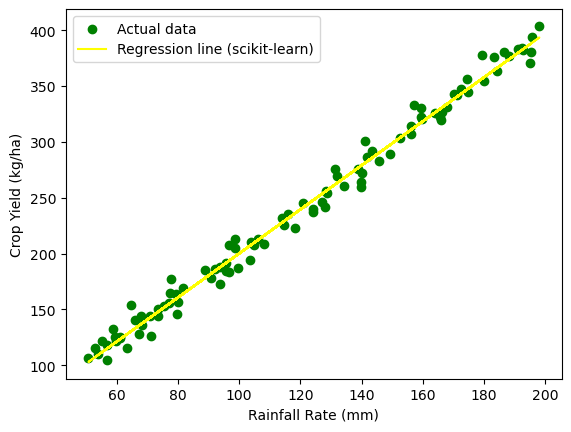

In [57]:
# Print coefficients from both models
print(f"Statsmodels Coefficients:\n{model_sm.params}")
print(f"Scikit-learn Coefficients:\nIntercept: {model_sk.intercept_}, Coefficient: {model_sk.coef_[0]}")

# Plot the original data and the regression line
plt.scatter(df['Rainfall'], df['CropYield'], color='green', label='Actual data')
plt.plot(df['Rainfall'], model_sk.predict(X_sk), color='yellow', label='Regression line (scikit-learn)')
plt.xlabel('Rainfall Rate (mm)')
plt.ylabel('Crop Yield (kg/ha)')
plt.legend()
plt.show()


Perform data exploration, preprocessing and splitting on datasets Boston Housing price from Scikit learn

In [17]:
import pandas as pd
import numpy as np

# Fetch the California housing dataset instead
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Convert to DataFrame (adjust column names accordingly)
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target  # Or appropriate target column name

# Continue with your analysis...
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      5

In [19]:
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display scaled feature means and variances
print("\nScaled feature means:")
print(np.mean(X_scaled, axis=0))
print("\nScaled feature variances:")
print(np.var(X_scaled, axis=0))



Scaled feature means:
[ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]

Scaled feature variances:
[1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display shapes of the splits
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



Training set shape: (16512, 8)
Testing set shape: (4128, 8)
